In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load the dataset
file_path = "/content/NPS.csv"
df = pd.read_csv(file_path)

# Selecting relevant numerical columns
numerical_columns = [
    "Toilet_cleanliness__c", "Time_taken_to_check_in_Counter_within15__c",
    "Staff_efficiency_at_the_counter__c", "Staff_efficiency_at_the_boarding_gate__c",
    "Staff_efficiency_at_the_arrival_desk__c", "Pre_travel_information_experience__c",
    "On_board_experience__c", "Booking_experience__c", "Check_in_experience__c",
    "Boarding_experience__c", "Arrival_experience__c", "Cabin_cleanliness__c",
    "Crew_helpfulness__c", "Experience_with_airport_security__c",
    "Clarity_of_pilot_announcements__c", "Clarity_of_crew_announcements__c",
    "Promotors__c", "Passive__c", "Detractors__c"
]

# Filtering dataset
df_filtered = df[numerical_columns].copy()

# Dropping rows with missing values
df_filtered = df_filtered.dropna()

# Defining features (X) and target variable (y)
X = df_filtered.drop(columns=["Promotors__c", "Passive__c", "Detractors__c"])
y = df_filtered["Promotors__c"]  # Predicting Promotors as target variable

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating R² score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.5297
RMSE: 0.3183


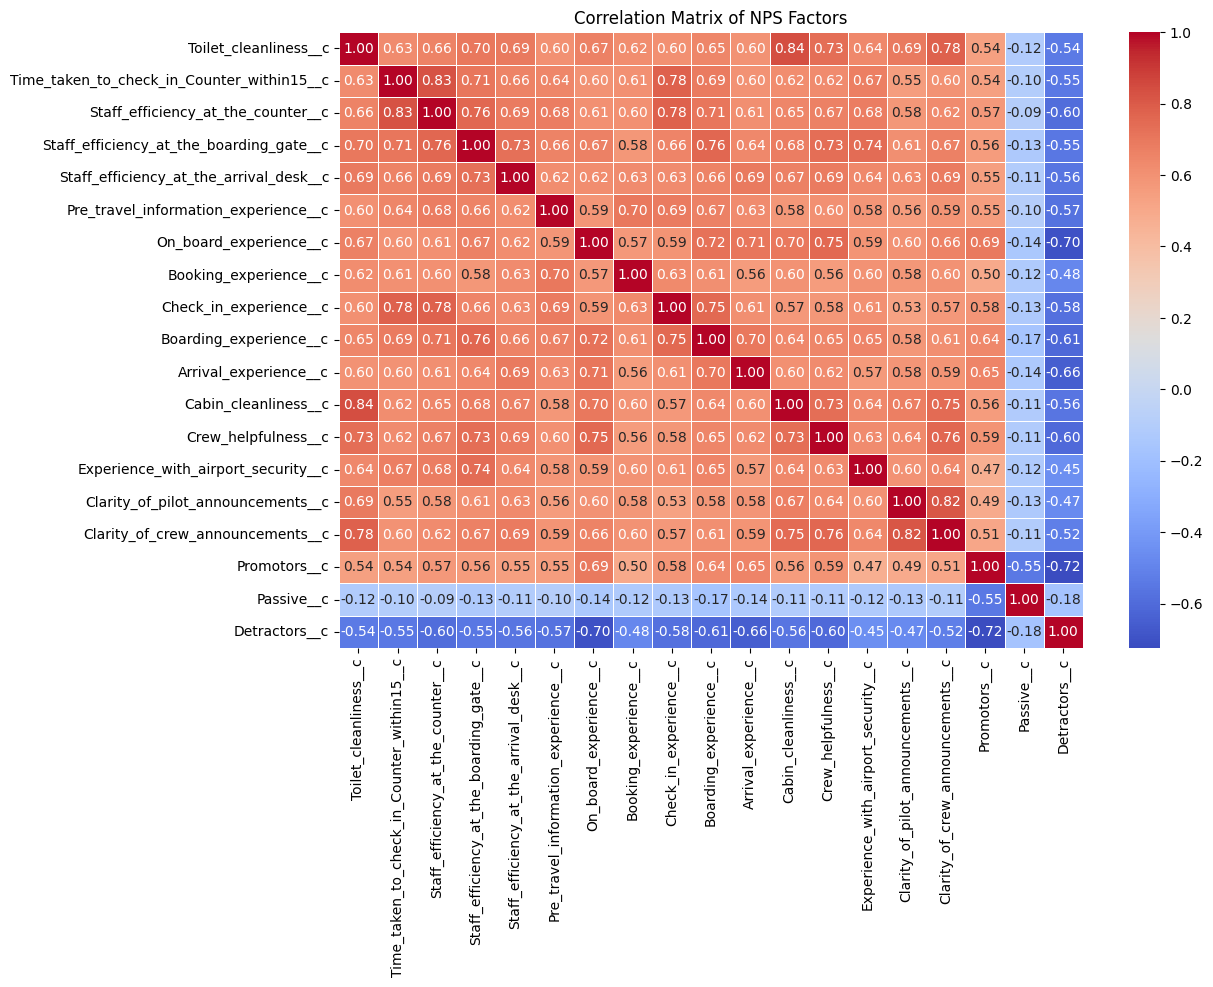

('Detractors__c', -0.7248419015806365)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_filtered.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of NPS Factors")
plt.show()

# Identify the most negatively correlated factor with NPS score (Promotors__c)
correlation_with_nps = correlation_matrix["Promotors__c"].sort_values()

# Most negatively correlated factor (affecting low NPS score)
most_affecting_factor = correlation_with_nps.idxmin(), correlation_with_nps.min()

most_affecting_factor


R² Score: 0.6276
RMSE: 0.2832


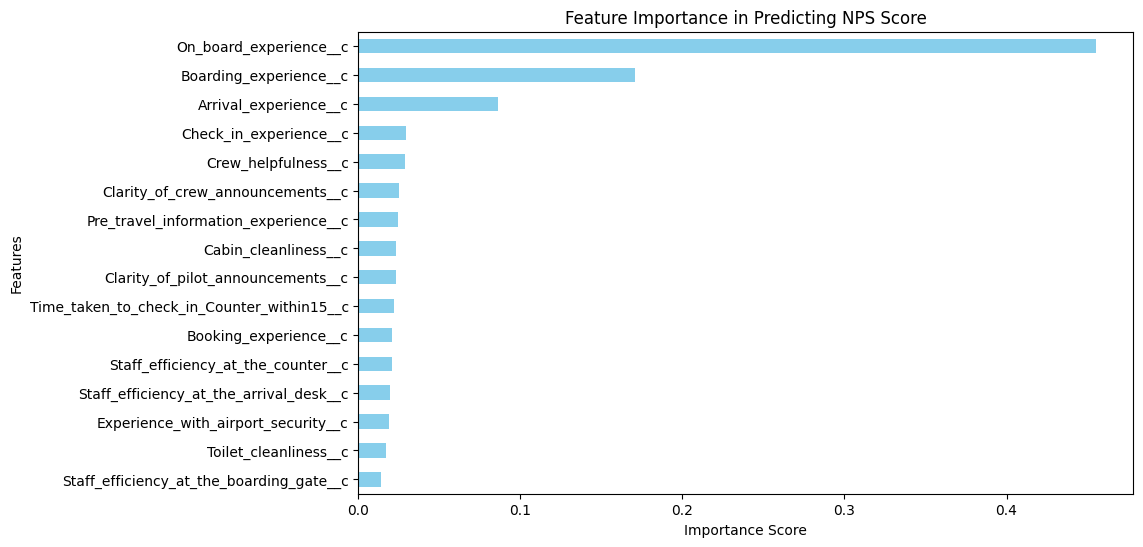

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/NPS.csv"
df = pd.read_csv(file_path)

# Selecting relevant numerical columns
numerical_columns = [
    "Toilet_cleanliness__c", "Time_taken_to_check_in_Counter_within15__c",
    "Staff_efficiency_at_the_counter__c", "Staff_efficiency_at_the_boarding_gate__c",
    "Staff_efficiency_at_the_arrival_desk__c", "Pre_travel_information_experience__c",
    "On_board_experience__c", "Booking_experience__c", "Check_in_experience__c",
    "Boarding_experience__c", "Arrival_experience__c", "Cabin_cleanliness__c",
    "Crew_helpfulness__c", "Experience_with_airport_security__c",
    "Clarity_of_pilot_announcements__c", "Clarity_of_crew_announcements__c",
    "Promotors__c", "Passive__c", "Detractors__c"
]

# Filtering dataset
df_filtered = df[numerical_columns].copy()

# Dropping rows with missing values
df_filtered = df_filtered.dropna()

# Defining features (X) and target variable (y)
X = df_filtered.drop(columns=["Promotors__c", "Passive__c", "Detractors__c"])
y = df_filtered["Promotors__c"]  # Predicting Promotors as target variable

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost regression model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating R² score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting NPS Score")
plt.show()

R² Score: 0.6276
RMSE: 0.2832


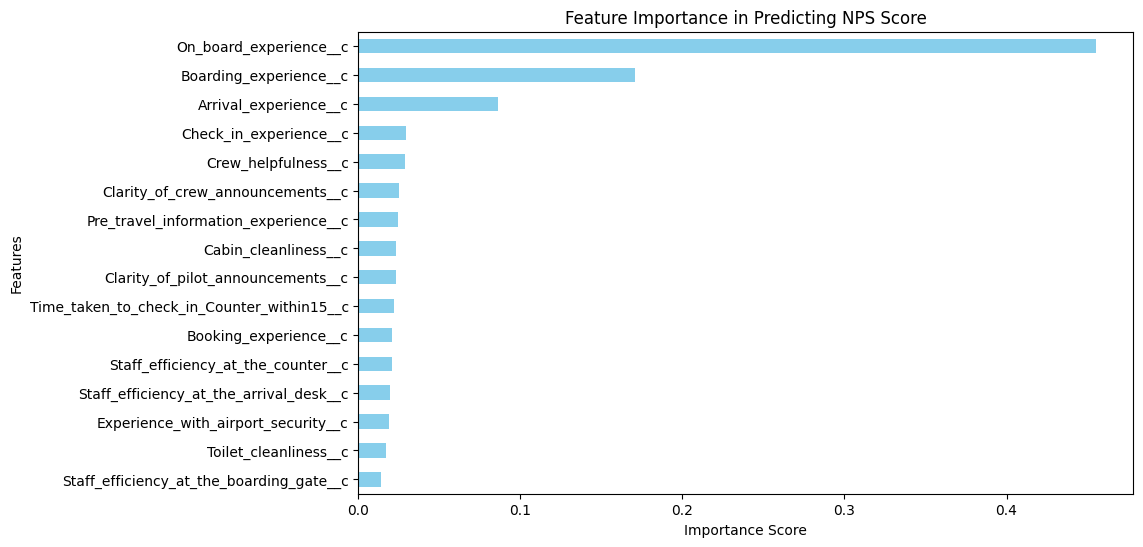

Predictions saved to /content/NPS_Predictions.csv

Tabulated Predictions with Scope for Improvement:
      Toilet_cleanliness__c  Time_taken_to_check_in_Counter_within15__c  \
1039                    4.0                                         4.0   
2477                    3.0                                         5.0   
1521                    5.0                                         5.0   
944                     4.0                                         4.0   
2173                    4.0                                         1.0   
1603                    5.0                                         5.0   
2468                    1.0                                         1.0   
2055                    5.0                                         5.0   
2536                    4.0                                         4.0   
409                     4.0                                         4.0   

      Staff_efficiency_at_the_counter__c  \
1039                         

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/NPS.csv"
df = pd.read_csv(file_path)

# Selecting relevant numerical columns
numerical_columns = [
    "Toilet_cleanliness__c", "Time_taken_to_check_in_Counter_within15__c",
    "Staff_efficiency_at_the_counter__c", "Staff_efficiency_at_the_boarding_gate__c",
    "Staff_efficiency_at_the_arrival_desk__c", "Pre_travel_information_experience__c",
    "On_board_experience__c", "Booking_experience__c", "Check_in_experience__c",
    "Boarding_experience__c", "Arrival_experience__c", "Cabin_cleanliness__c",
    "Crew_helpfulness__c", "Experience_with_airport_security__c",
    "Clarity_of_pilot_announcements__c", "Clarity_of_crew_announcements__c",
    "Promotors__c", "Passive__c", "Detractors__c"
]

# Filtering dataset
df_filtered = df[numerical_columns].copy()

# Dropping rows with missing values
df_filtered = df_filtered.dropna()

# Defining features (X) and target variable (y)
X = df_filtered.drop(columns=["Promotors__c", "Passive__c", "Detractors__c"])
y = df_filtered["Promotors__c"]  # Predicting Promotors as target variable

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost regression model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating R² score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting NPS Score")
plt.show()

# Create a DataFrame to tabulate predictions with features
results_df = X_test.copy()
results_df["Actual_NPS"] = y_test.values
results_df["Predicted_NPS"] = y_pred
results_df["Prediction_Error"] = results_df["Actual_NPS"] - results_df["Predicted_NPS"]

# Save the tabulated results to a CSV file
output_file = "/content/NPS_Predictions.csv"
results_df.to_csv(output_file, index=False)
print(f"Predictions saved to {output_file}")

# Display the tabulated results
print("\nTabulated Predictions with Scope for Improvement:")
print(results_df.head(10))


<ipython-input-7-e34bad709abe>:19: DtypeWarning: Columns (54,62,67,69,71,77,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73398 entries, 0 to 73397
Data columns (total 85 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NPS_Type__c                                      73398 non-null  object 
 1   Language__c                                      73398 non-null  object 
 2   Device__c                                        73398 non-null  object 
 3   Device_Name__c                                   73398 non-null  object 
 4   Channels__c                                      73396 non-null  object 
 5   Browser__c                                       73398 non-null  object 
 6   Toilet_cleanliness__c                            59027 non-null  float64
 7   Time_taken_to_check_in_Counter_within15__c       62016 non-null  float64
 8   Staff_efficiency_at_the_counter__c               61588 non-null  float64
 9   Staff_efficiency_at_the_boar

None

,Toilet_cleanliness__c,Time_taken_to_check_in_Counter_within15__c,Staff_efficiency_at_the_counter__c,Staff_efficiency_at_the_boarding_gate__c,Staff_efficiency_at_the_arrival_desk__c,Snacks_and_beverage_if_experienced__c,Service_experience_Contact_center__c,Required_information_available_on_websit__c,Relevant_information_before_arriving_at__c,Query_handling_Contact_center_Dottie__c,...,Cabin_cleanliness__c,Detractors__c,Booking_experience__c,Boarding_information_shared_display__c,Boarding_experience__c,Arrival_experience__c,Baggage_Count__c,Baggage_Weight__c,FLTNBR__c,Total_No_Of_Pax__c
count,59027.000000,62016.000000,61588.000000,63337.000000,59946.000000,24725.000000,57300.000000,57162.000000,57030.000000,54530.000000,...,64418.000000,73398.000000,71891.000000,64099.000000,71858.000000,70947.000000,73397.000000,73397.000000,73397.000000,73397.000000
mean,4.070951,3.957317,4.015863,4.018078,4.004004,3.214722,3.961867,4.041828,4.040593,3.891069,...,4.108308,0.304681,4.192778,4.080953,3.820298,3.846110,1.408491,17.361255,3255.962655,1.665123
std,1.136954,1.309619,1.299747,1.260815,1.250674,1.514999,1.279175,1.151395,1.211252,1.290847,...,1.128414,0.460275,1.050785,1.198047,1.386931,1.389143,1.443972,19.141335,2659.529988,1.172549
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,11.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,0.000000,4.000000,4.000000,3.000000,3.000000,1.000000,6.000000,684.000000,1.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,1.000000,13.000000,2241.000000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,2.000000,24.000000,6149.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,38.000000,477.000000,9889.000000,46.000000


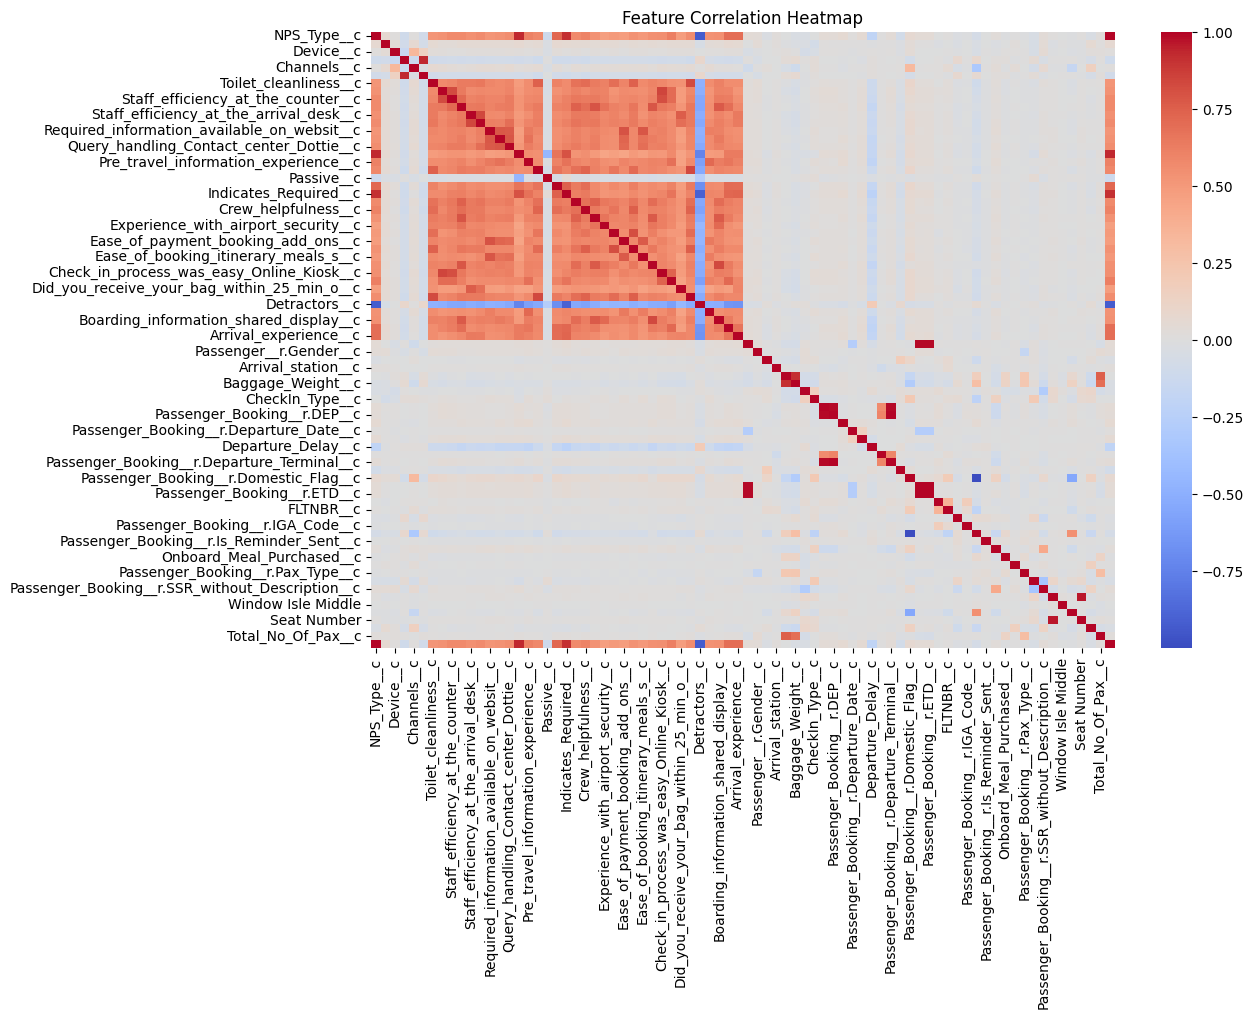

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Random Forest R2 Score: 0.7179366661953921 | Cross-Validation Mean R2: 0.7225291903138779
Gradient Boosting R2 Score: 0.7250243443778491 | Cross-Validation Mean R2: 0.7270752068315474
Lasso Regression R2 Score: 0.6337206309387745 | Cross-Validation Mean R2: 0.6398740376646119
Ridge Regression R2 Score: 0.6337185968581929 | Cross-Validation Mean R2: 0.6398870340342395
XGBoost R2 Score: 0.7251151783790073 | Cross-Validation Mean R2: 0.7270909705031887


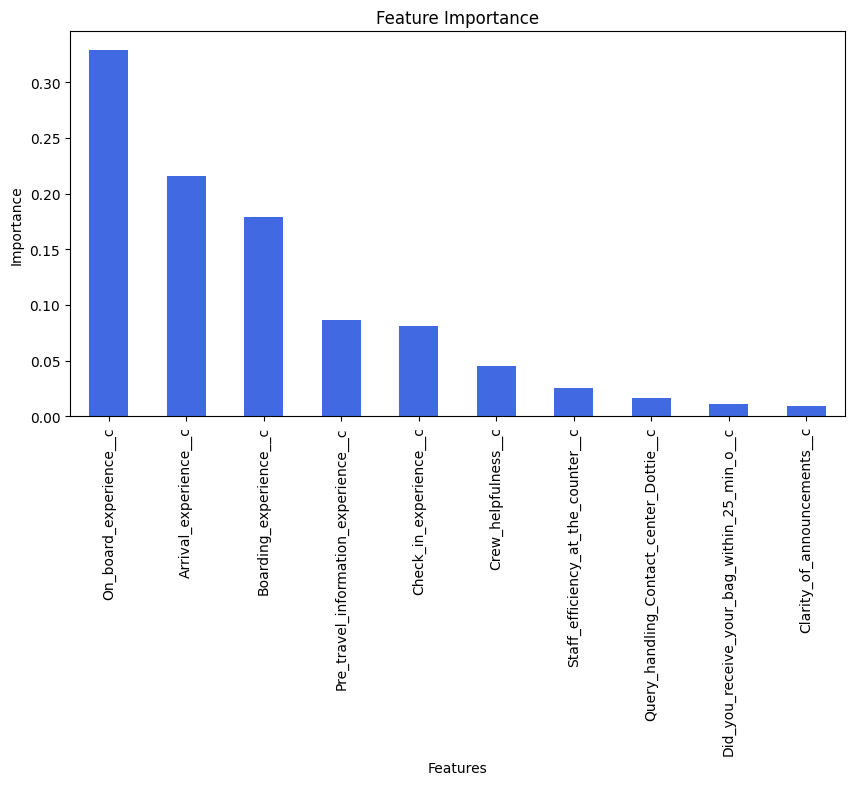

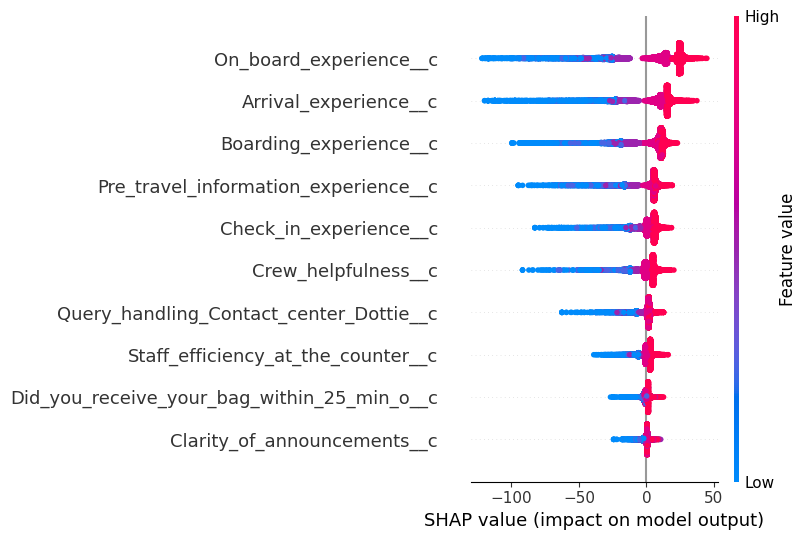

<ipython-input-7-e34bad709abe>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances.values, palette='coolwarm')


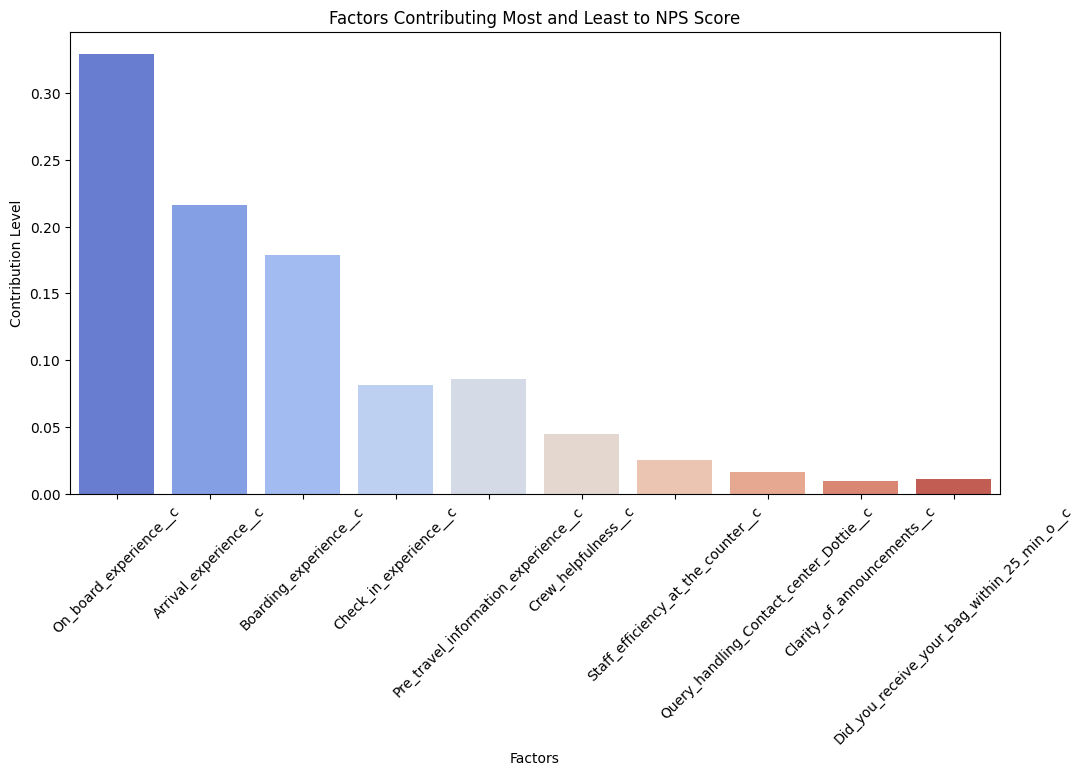

Optimized model and scaler saved for future use.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb

# Load dataset
file_path = "/content/drive/MyDrive/Feb 71LakhRecordsNPS4CorelationV1.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Display basic info
display(df.info())
display(df.describe())
df.head()

# Check for missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)  # Drop columns with >50% missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Compute NPS Score
df["NPS_Score"] = ((df["Promotors__c"] - df["Detractors__c"]) / (df["Promotors__c"] + df["Passive__c"] + df["Detractors__c"])) * 100

# Encode categorical columns
for col in df.select_dtypes(exclude=[np.number]).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Remove highly correlated features
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

correlation_threshold = 0.2
nps_corr = df.corr()["NPS_Score"].sort_values(ascending=False)
selected_features = nps_corr[abs(nps_corr) > correlation_threshold].index.tolist()
selected_features.remove("NPS_Score")

# Apply VIF to remove multicollinear features
X = df[selected_features]
vif_df = calculate_vif(X)
X = X[vif_df[vif_df["VIF"] < 5]["Feature"]]  # Keep features with VIF < 5
y = df["NPS_Score"]

# Feature selection using Recursive Feature Elimination (RFE)
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rfe = RFE(rf, n_features_to_select=10)
X_selected = rfe.fit_transform(X, y)
selected_feature_names = X.columns[rfe.support_]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2, n_iter=10)
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Model comparison
models = {
    "Random Forest": best_rf,
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} R2 Score: {r2_score(y_test, y_pred)} | Cross-Validation Mean R2: {np.mean(cv_scores)}")

# Feature Importance
feature_importances = pd.Series(best_rf.feature_importances_, index=selected_feature_names)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='royalblue')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# SHAP Analysis
explainer = shap.TreeExplainer(best_rf)  # Using TreeExplainer directly
shap_values = explainer.shap_values(X_test)  # Extracting SHAP values correctly
shap.summary_plot(shap_values, X_test, feature_names=selected_feature_names)

# Factor Contribution Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importances.index, y=feature_importances.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Factors Contributing Most and Least to NPS Score")
plt.xlabel("Factors")
plt.ylabel("Contribution Level")
plt.show()

# Save Model and Scaler
joblib.dump(best_rf, "best_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Optimized model and scaler saved for future use.")
